In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Define some useful functions

#### Functions for cleaning

In [4]:
def split_semicolon_in_rows(data: pd.DataFrame, column: str):
    expanded_rows = []
    for _, row in data.iterrows():
        if not pd.isnull(row[column]):
            if ';' in row[column]:
                split_strings = row[column].split('; ')
                for string in split_strings:
                    split_row = row.copy()
                    split_row[column] = string
                    expanded_rows.append(split_row)
            else:
                expanded_rows.append(row)
    return pd.DataFrame(expanded_rows)

#### Functions for visualization

In [6]:
def draw_simple_bar_plot(data: pd.DataFrame, column: str, title: str, xlabel: str, ylabel: str, rotation_value = 0):
    sources_counts = data[column].value_counts()
    plot = plt.bar(sources_counts.index, sources_counts.values, color=sns.color_palette('viridis', len(sources_counts)))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation_value)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    return plot

In [7]:
def scatterplot_X_vs_Y(data: pd.DataFrame, x: str, y: str, title: str, xlabel: str, ylabel: str, 
                       show_text_if_more_than_x=0, show_text_if_more_than_y=0, ishue=False, islegend=False, legend_title='', hue=''):
    if ishue:
        plot = sns.scatterplot(data=data, 
                x=x, 
                y=y,
                hue=hue, 
                palette='Set1', 
                alpha=0.7)
    else:
        plot = sns.scatterplot(data=data, 
                x=x, 
                y=y,  
                alpha=0.7)
    
    for i, row in df_datasets.iterrows():
        if (row[y] > show_text_if_more_than_y and 
            row[x] > show_text_if_more_than_x):
            plt.text(
                row[x], 
                row[y] + 0.02 * (data[y].max() - data[y].min()), 
                str(row['Dataset']), 
                fontsize=8, 
                alpha=0.7
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if islegend:
        plt.legend(title=legend_title)
    plt.grid(True)
    return plot

In [8]:
def scatterplot_X_vs_Y_in_range(data: pd.DataFrame, x: str, y: str, title: str, xlabel: str, ylabel: str, 
                                lower_boundery: int, upper_boundery: int, ishue=False, islegend=False, legend_title='', hue=''):
    filtered_data = data[(data[x] >= lower_boundery) & (data[x] <= upper_boundery)]
    
    if ishue and hue in data.columns:
        scatter = sns.scatterplot(data=filtered_data, x=x, y=y, hue=hue, palette='Set1')
    else:
        scatter = sns.scatterplot(data=filtered_data, x=x, y=y, color='blue')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if 'Dataset' in filtered_data.columns:
        for _, row in filtered_data.iterrows():
            plt.text(row[x], row[y], str(row['Dataset']), fontsize=8, alpha=0.7)

    if islegend and ishue:
        plt.legend(title=legend_title)
    else:
        plt.legend([], [], frameon=False)  # Hide legend if not needed
    plt.grid(True)
    return scatter

In [9]:
def draw_stacked_simple_plot(data: pd.DataFrame, x: str, y: str, hue: str, title: str, xlabel: str, ylabel: str):
    plt.figure(figsize=(8, 6))  
    
    palette = sns.color_palette("bright")

    plot = sns.barplot(
        x=x, y=y, hue=hue, data=data, estimator=sum, dodge=False, errorbar=None, palette=palette, edgecolor="black"
    )
    
    plt.yscale("log")  
    
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')

    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    plt.xticks(rotation=30, fontsize=11)

    return plot

### Function for processing data

In [17]:
def extract_by_features(data: pd.DataFrame, features: list, value_features: list, list, not_null_features: list = None) -> pd.DataFrame:
    assert len(features) == len(value_features)
    mask = pd.Series([True] * len(data))
    
    for feature, value in zip(features, value_features):
        mask &= (data[feature] == value)

    if not_null_features is not None:
        not_null_mask = pd.Series([False] * len(data))
        for feature in not_null_features:
            not_null_mask |= data[feature].notnull()
        mask &= not_null_mask
    
    return data[mask]

### Learn Data

In [20]:
df_datasets = pd.read_csv('datasets.csv', delimiter=';', quotechar='"')

In [22]:
print("Basic Info:\n")
print(df_datasets.info())

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 29 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Dataset                                                                                       54 non-null     object
 1   Number of citations (Google Scholar)                                                          54 non-null     object
 2   Number of Papers (Papers with code since 2020)                                                54 non-null     object
 3   Number of Evaluations (Papers with code API)                                                  54 non-null     object
 4   Music/Speech/Sounds                                                                           54 non-null     object
 5   Link                     

In [24]:
# set up numeric columns
numeric_columns = ['Number of citations (Google Scholar)', 'Number of Papers (Papers with code since 2020)', 
                   'Number of Evaluations (Papers with code API)', 'Score or best score in Paper', 'Size (Hours)', 
                   'Number of Benchmarks (Audio Classification or Recognition Papers with Code different models)',
                   'Best Scoure']

df_datasets[numeric_columns] = df_datasets[numeric_columns].replace({',':'.'}, regex=True)
df_datasets[numeric_columns] = df_datasets[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [26]:
# top 5 most cited datasets
most_cited = df_datasets.nlargest(5, 'Number of citations (Google Scholar)')
print("\nTop 5 Most Cited Datasets:\n")
print(most_cited[['Dataset', 'Number of citations (Google Scholar)']])

# top 5 most used datasets
most_used = df_datasets.nlargest(5, 'Number of Papers (Papers with code since 2020)')
print("\nTop 5 Most Used Datasets:\n")
print(most_used[['Dataset', 'Number of Papers (Papers with code since 2020)']])

# datasets by category
category_counts = df_datasets['Music/Speech/Sounds'].value_counts()
print("\nDatasets by Category:\n")
print(category_counts)

# datasets by original usecase
orinal_use_case = df_datasets['Original Usecase'].value_counts()
print("\nDatasets by Usecase:\n")
print(orinal_use_case)

# comment why good or bad downloadable
comment_for_downloadable = df_datasets['Download Comment'].value_counts()
print("\nDownload Comments:\n")
print(comment_for_downloadable)


Top 5 Most Cited Datasets:

                                              Dataset  \
5                                         LibriSpeech   
39                                            IEMOCAP   
0                                            AudioSet   
20  EmoDB Dataset (Berlin Database of Emotional Sp...   
34  RAVDESS (Ryerson Audio-Visual Database of Emot...   

    Number of citations (Google Scholar)  
5                                 7494.0  
39                                4124.0  
0                                 3950.0  
20                                3072.0  
34                                2154.0  

Top 5 Most Used Datasets:

         Dataset  Number of Papers (Papers with code since 2020)
5    LibriSpeech                                          1922.0
0       AudioSet                                           591.0
39       IEMOCAP                                           558.0
10     VoxCeleb1                                           490.0
8   Common Voice 

### Spit Data

In [29]:
df_datasets_clean_with_duplicates = split_semicolon_in_rows(df_datasets, 'Music/Speech/Sounds')
df_datasets_clean_with_duplicates = split_semicolon_in_rows(df_datasets_clean_with_duplicates, 'Download Comment')
df_datasets_clean_with_duplicates = split_semicolon_in_rows(df_datasets_clean_with_duplicates, 'Source')

### Explore Data and Visualization

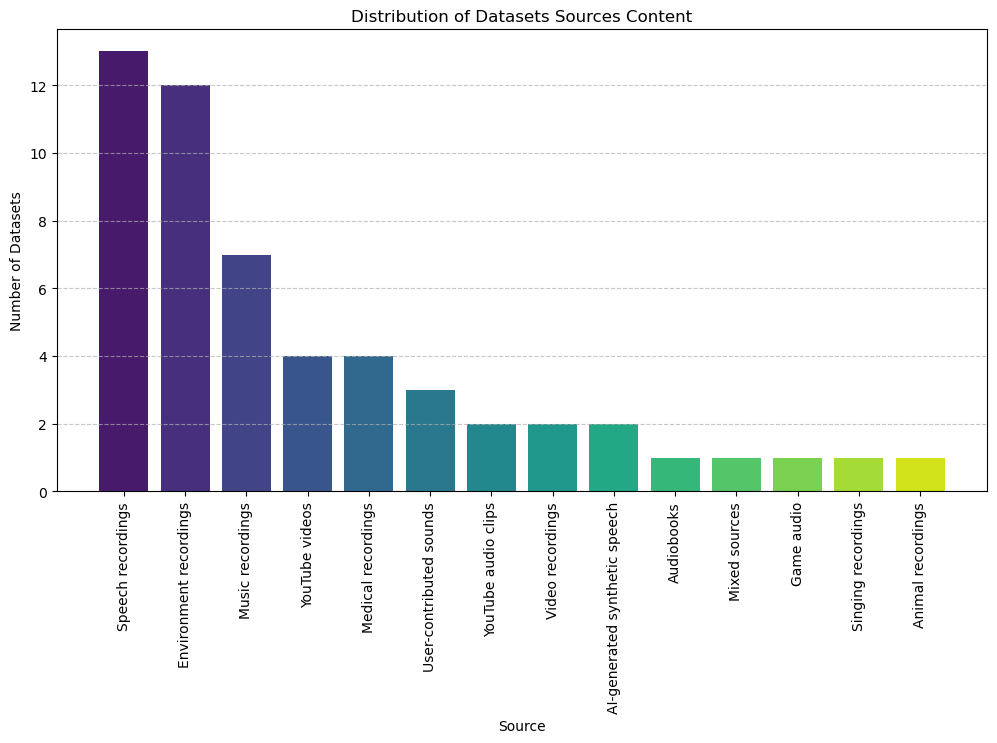

In [32]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets, 'Category Source', 'Distribution of Datasets Sources Content', 'Source', 'Number of Datasets', 90)

plt.show()

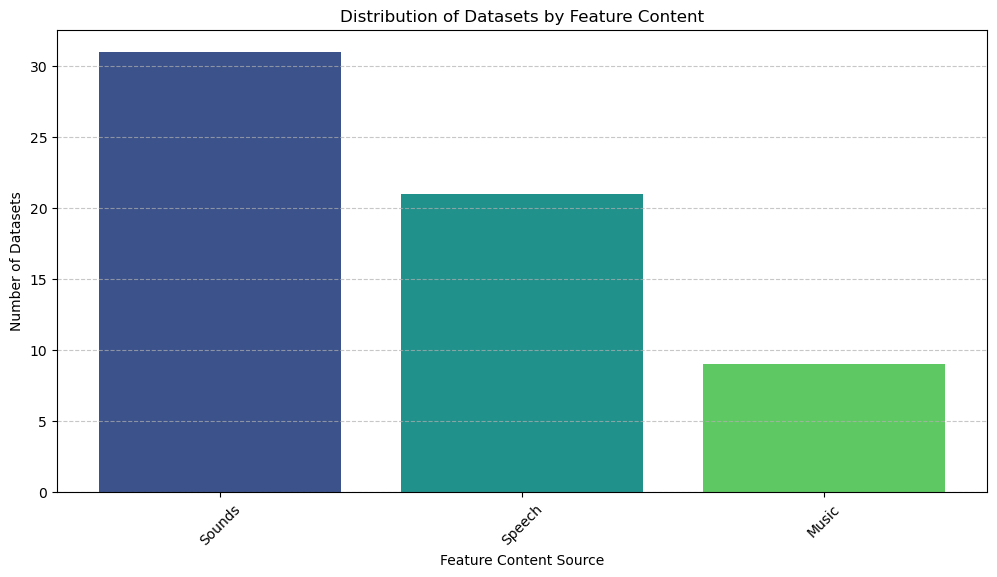

In [34]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets_clean_with_duplicates, 'Music/Speech/Sounds', 'Distribution of Datasets by Feature Content', 'Feature Content Source', 'Number of Datasets', 45)

plt.show()

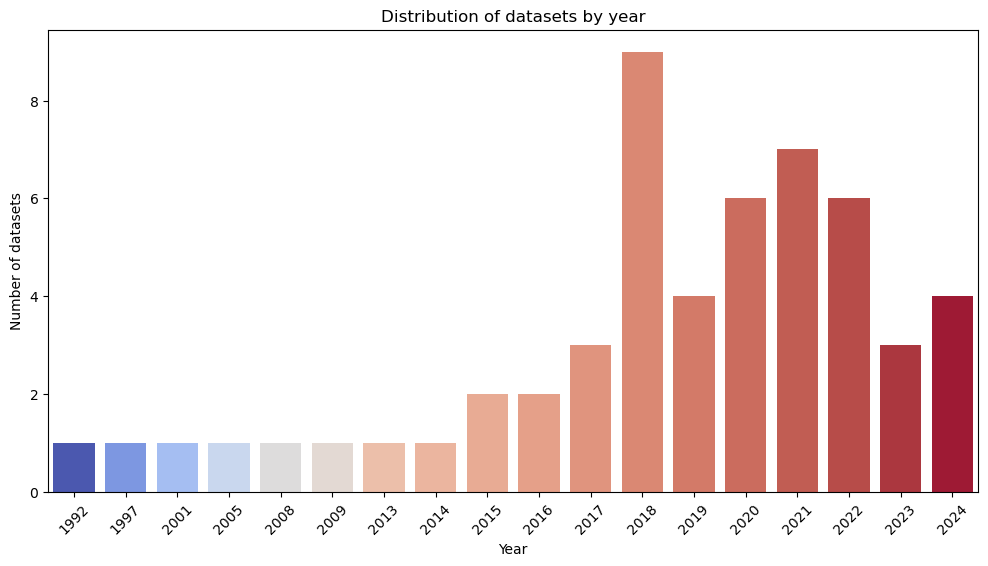

In [36]:
plt.figure(figsize=(12, 6))

sns.countplot(df_datasets, x='Year', palette='coolwarm', hue='Year', order=sorted(df_datasets['Year'].dropna().unique()))
plt.title('Distribution of datasets by year')
plt.xlabel('Year')
plt.ylabel('Number of datasets')
plt.xticks(rotation=45)

plt.legend([], [], frameon=False)

plt.show()

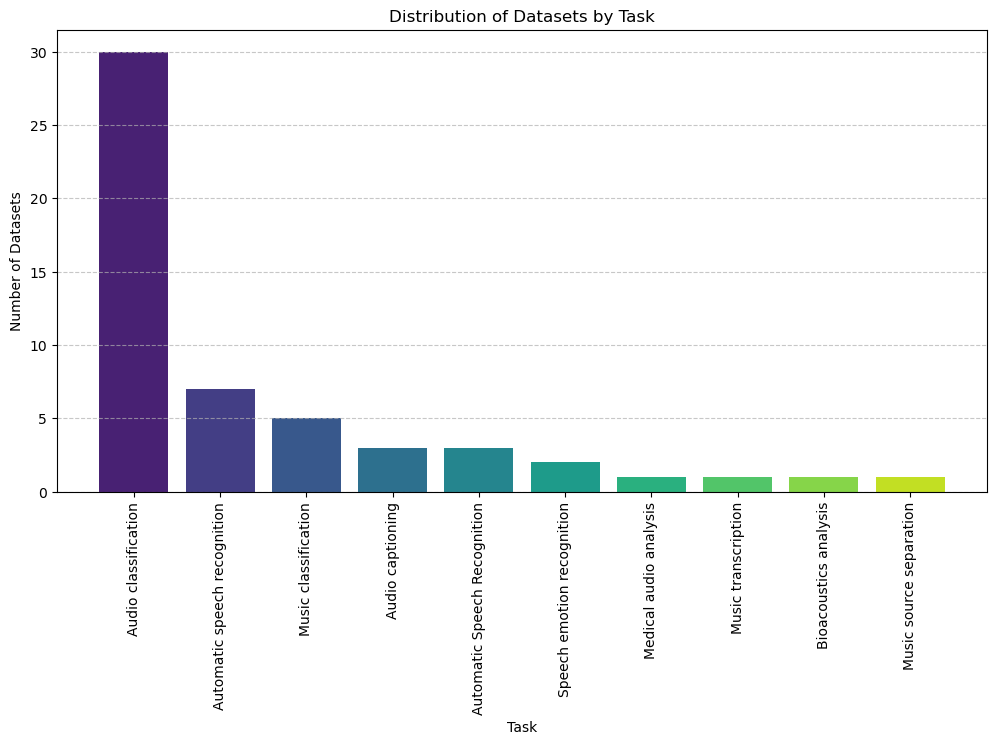

In [38]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets, 'Original Usecase', 'Distribution of Datasets by Task', 'Task', 'Number of Datasets', 90)

plt.show()

<Figure size 1200x600 with 0 Axes>

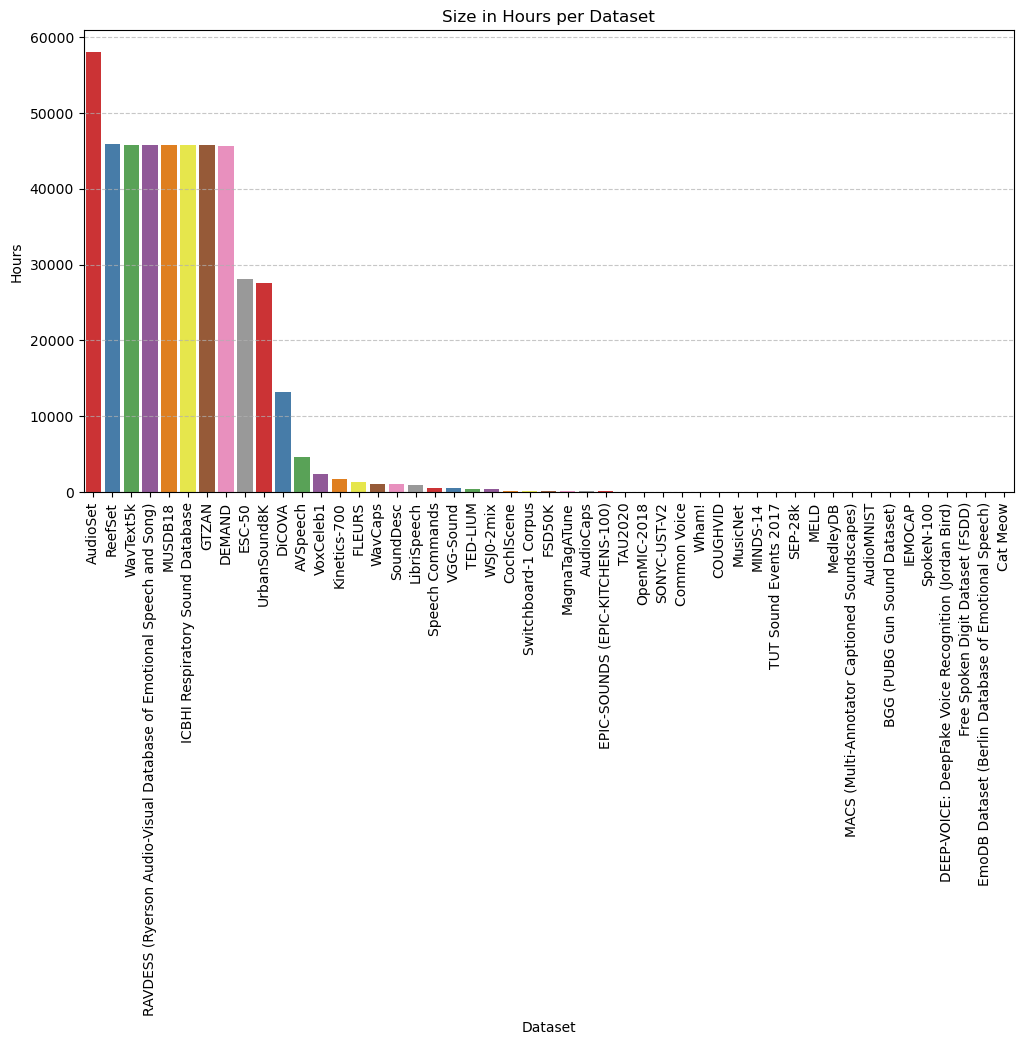

In [40]:
df_datasets_without_na_hours = df_datasets.dropna(subset=['Dataset', 'Original Usecase', 'Music/Speech/Sounds', 'Size (Hours)'])

plt.figure(figsize=(12, 6))

df_sorted = df_datasets_without_na_hours.sort_values(by='Size (Hours)', ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(data=df_sorted, x='Dataset', y='Size (Hours)', hue='Dataset', palette='Set1', legend=False)

plt.title('Size in Hours per Dataset')
plt.xlabel('Dataset')
plt.ylabel('Hours')

plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()


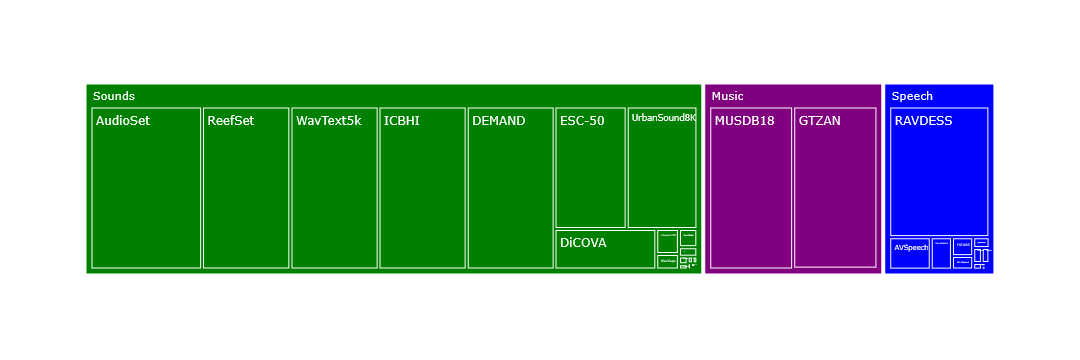

In [52]:
import plotly.express as px

df_datasets_without_na_hours.loc[df_datasets_without_na_hours['Dataset'] == "RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song)", 'Dataset'] = "RAVDESS"
df_datasets_without_na_hours.loc[df_datasets_without_na_hours['Dataset'] == "ICBHI Respiratory Sound Database", 'Dataset'] = "ICBHI"

fig = px.treemap(df_datasets_without_na_hours, 
                 path=['Music/Speech/Sounds', 'Dataset'], 
                 values='Size (Hours)', 
                 color='Music/Speech/Sounds',
                 color_discrete_map={"Speech": "blue", "Music": "purple", "Sounds": "green"})

fig.show()

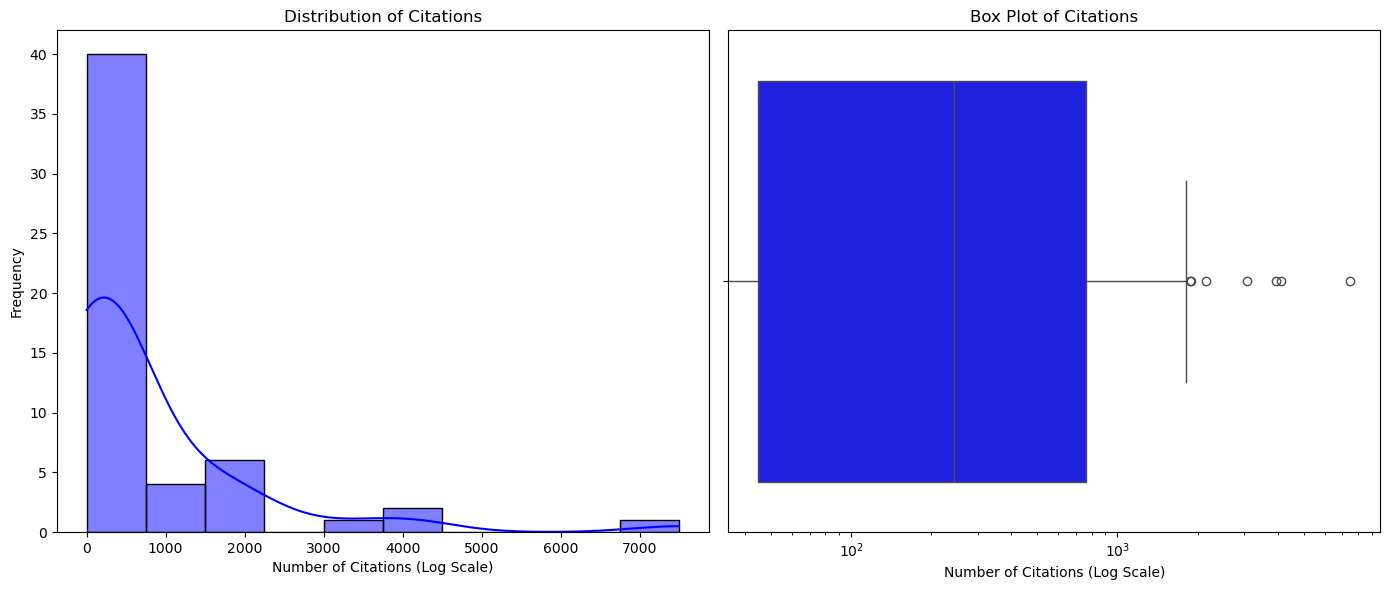

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_datasets['Number of citations (Google Scholar)'], bins=10, kde=True, color='blue', ax=axes[0])
#axes[0].set_xscale('log')
axes[0].set_title('Distribution of Citations')
axes[0].set_xlabel('Number of Citations (Log Scale)')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_datasets['Number of citations (Google Scholar)'], color='blue', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Box Plot of Citations')
axes[1].set_xlabel('Number of Citations (Log Scale)')

plt.tight_layout() 
plt.show()

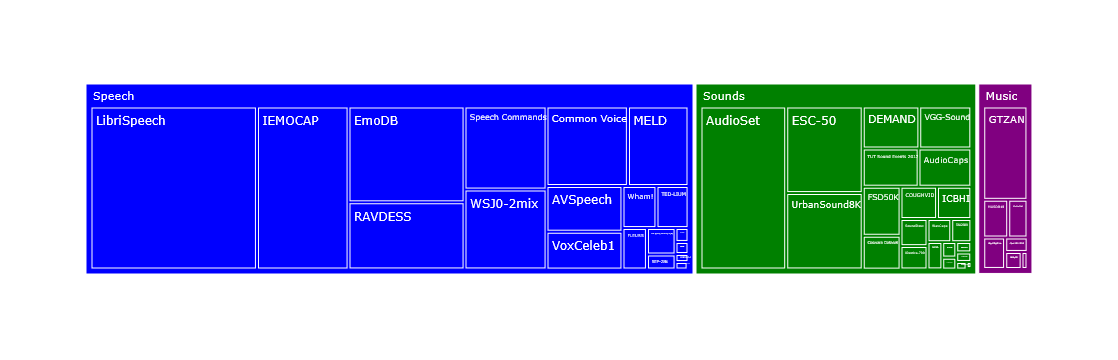

In [64]:
df_datasets_temp = df_datasets

df_datasets_temp.loc[df_datasets_temp['Dataset'] == "RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song)", 'Dataset'] = "RAVDESS"
df_datasets_temp.loc[df_datasets_temp['Dataset'] == "ICBHI Respiratory Sound Database", 'Dataset'] = "ICBHI"
df_datasets_temp.loc[df_datasets_temp['Dataset'] == "EmoDB Dataset (Berlin Database of Emotional Speech)", 'Dataset'] = "EmoDB"

fig = px.treemap(df_datasets_temp, 
                 path=['Music/Speech/Sounds', 'Dataset'], 
                 values='Number of citations (Google Scholar)', 
                 color='Music/Speech/Sounds',
                 color_discrete_map={"Speech": "blue", "Music": "purple", "Sounds": "green"})

fig.show()

In [66]:
print("Top 10 most cited datasets:")
print(df_datasets.nlargest(10, 'Number of citations (Google Scholar)')[['Dataset', 'Number of citations (Google Scholar)']])

Top 10 most cited datasets:
            Dataset  Number of citations (Google Scholar)
5       LibriSpeech                                7494.0
39          IEMOCAP                                4124.0
0          AudioSet                                3950.0
20            EmoDB                                3072.0
34          RAVDESS                                2154.0
13  Speech Commands                                1882.0
4            ESC-50                                1872.0
40        WSJ0-2mix                                1812.0
8      Common Voice                                1787.0
3      UrbanSound8K                                1653.0


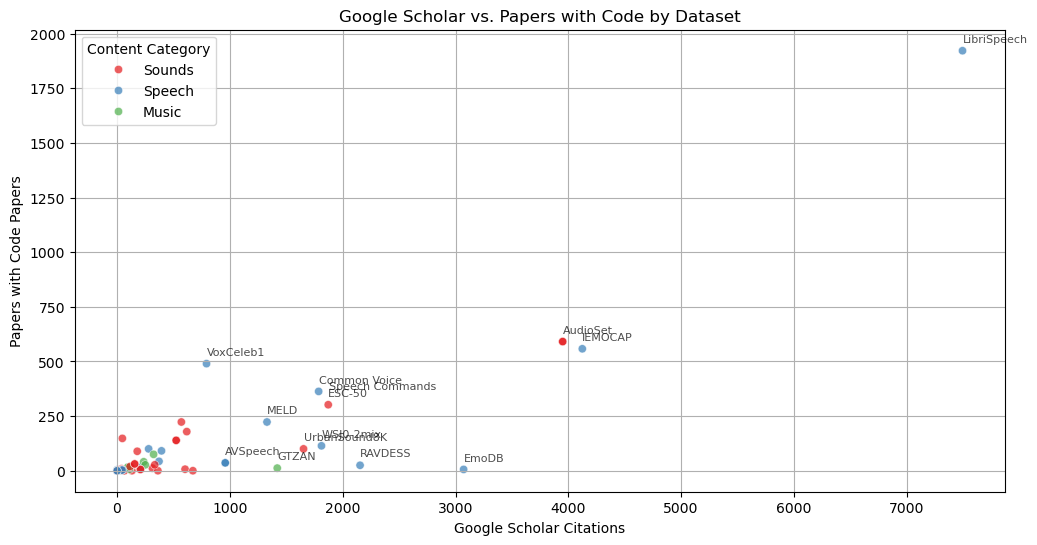

In [68]:
plt.figure(figsize=(12, 6))

plot = scatterplot_X_vs_Y(df_datasets_clean_with_duplicates, x='Number of citations (Google Scholar)', y='Number of Papers (Papers with code since 2020)',
                          title='Google Scholar vs. Papers with Code by Dataset', xlabel='Google Scholar Citations', ylabel='Papers with Code Papers', 
                          ishue=True, hue='Music/Speech/Sounds', islegend=True, legend_title='Content Category', show_text_if_more_than_x=700) 
plt.show()

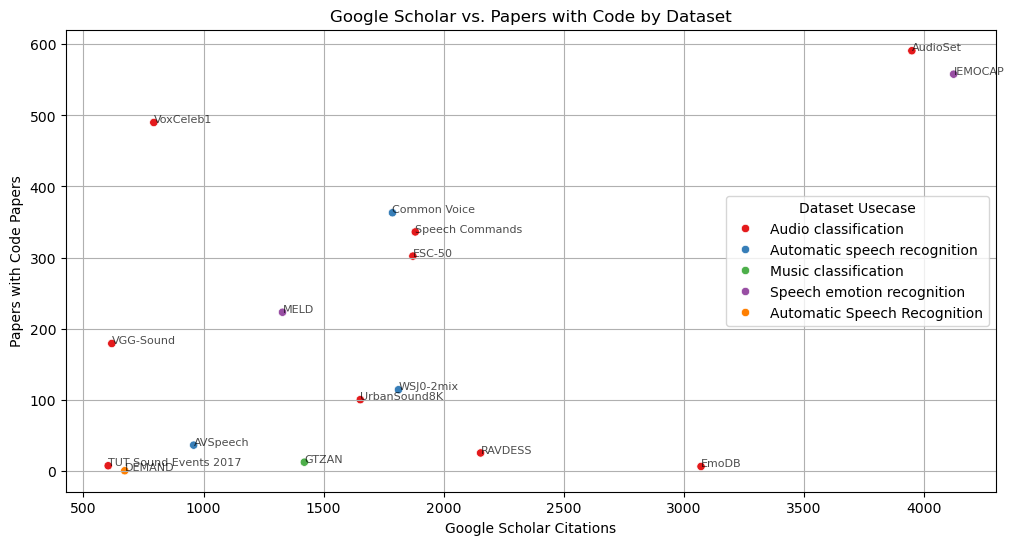

In [70]:
plt.figure(figsize=(12, 6))

plot = scatterplot_X_vs_Y_in_range(df_datasets, x='Number of citations (Google Scholar)', y='Number of Papers (Papers with code since 2020)',
                                   title='Google Scholar vs. Papers with Code by Dataset', xlabel='Google Scholar Citations', 
                                   ylabel='Papers with Code Papers', lower_boundery=600, upper_boundery=5000, ishue=True, hue='Original Usecase', 
                                   islegend=True, legend_title='Dataset Usecase')

plt.show()

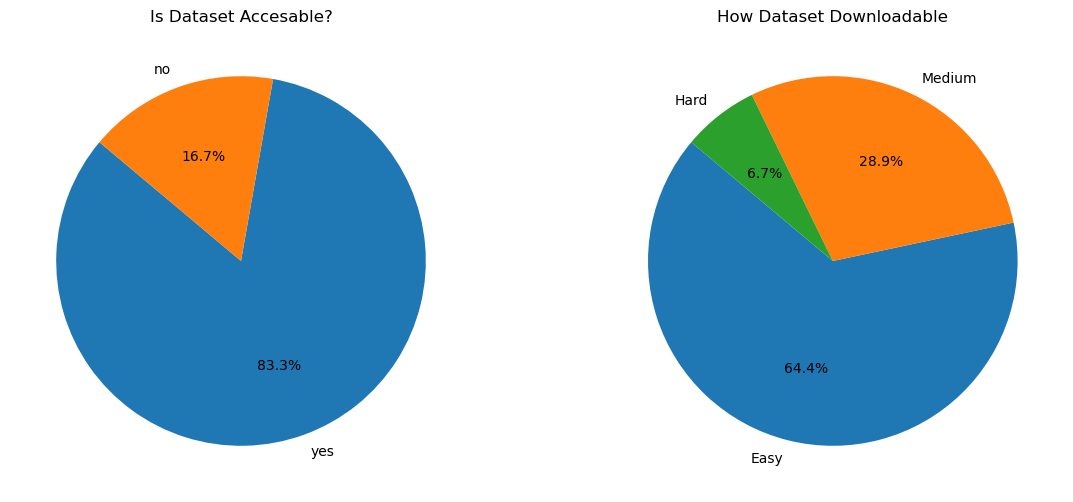

In [72]:
accessable_datasets = df_datasets['Accessable'].value_counts()
downloadable_datasets = df_datasets['Downloadable'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(accessable_datasets, labels=accessable_datasets.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Is Dataset Accesable?')

axes[1].pie(downloadable_datasets, labels=downloadable_datasets.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('How Dataset Downloadable')

plt.show()

In [76]:
df_datasets["Language Category"] = df_datasets["Language"].apply(
    lambda x: "English" if x == "English" else ("Non-English" if pd.notna(x) else "N/A")
)

df_grouped = df_datasets["Language Category"].value_counts().reset_index()
df_grouped.columns = ["Language Category", "Count"]

print(df_grouped)  

  Language Category  Count
0               N/A     28
1           English     20
2       Non-English      6


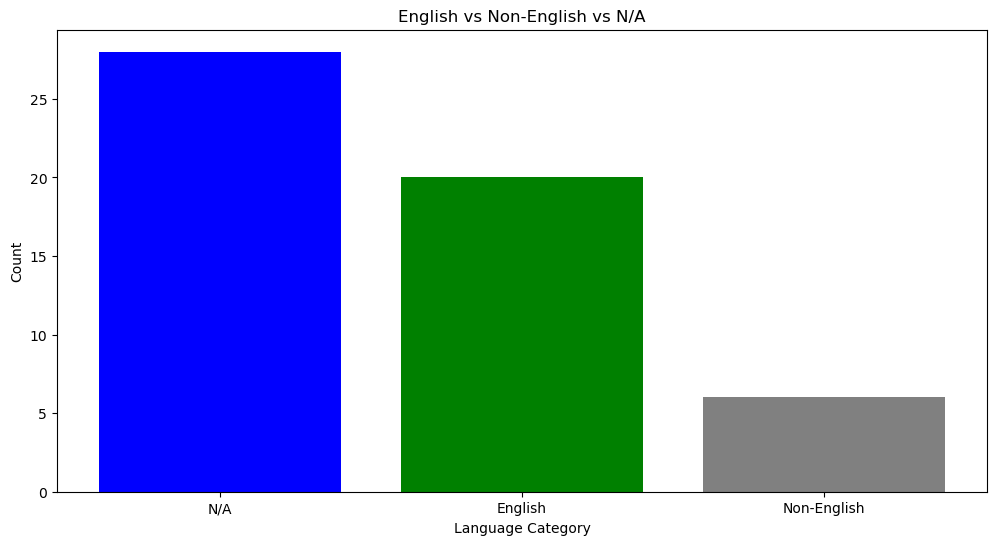

In [80]:
plt.figure(figsize=(12, 6))
plt.bar(df_grouped["Language Category"], df_grouped["Count"], color=["blue", "green", "gray"])
plt.xlabel("Language Category")
plt.ylabel("Count")
plt.title("English vs Non-English vs N/A")
plt.show()

### Explore Classification Datasets

In [83]:
df_datasets_original_classification = df_datasets[df_datasets['Original Usecase'].str.contains('Audio classification', na=False)]

In [85]:
# top 5 most cited datasets
most_cited = df_datasets_original_classification.nlargest(5, 'Number of citations (Google Scholar)')
print("\nTop 5 Most Cited Datasets:\n")
print(most_cited[['Dataset', 'Number of citations (Google Scholar)']])

# top 5 most used datasets
most_used = df_datasets_original_classification.nlargest(5, 'Number of Papers (Papers with code since 2020)')
print("\nTop 5 Most Number of Papers (Papers with code since 2020) Datasets:\n")
print(most_used[['Dataset', 'Number of Papers (Papers with code since 2020)']])

# datasets by category
category_counts = df_datasets_original_classification['Music/Speech/Sounds'].value_counts()
print("\nDatasets by Category:\n")
print(category_counts)

# datasets sum size
size_counts = df_datasets_original_classification['Size (Hours)'].sum()
print("\nSize (Hours):\n")
print(size_counts)


Top 5 Most Cited Datasets:

            Dataset  Number of citations (Google Scholar)
0          AudioSet                                3950.0
20            EmoDB                                3072.0
34          RAVDESS                                2154.0
13  Speech Commands                                1882.0
4            ESC-50                                1872.0

Top 5 Most Number of Papers (Papers with code since 2020) Datasets:

            Dataset  Number of Papers (Papers with code since 2020)
0          AudioSet                                           591.0
10        VoxCeleb1                                           490.0
13  Speech Commands                                           336.0
4            ESC-50                                           302.0
6         VGG-Sound                                           179.0

Datasets by Category:

Music/Speech/Sounds
Sounds    17
Speech    13
Name: count, dtype: int64

Size (Hours):

181242.32999999996


In [89]:
df_datasets_filtered_classification_1 = extract_by_features(df_datasets, 
                               ['Original Usecase', 'Accessable', 'Downloadable'], 
                               ['Audio classification', 'yes', 'Easy'],
                               ['Score or best score in Paper', 'Best Scoure']
                              )

In [91]:
df_datasets_filtered_classification_1

Dataset  Number of citations (Google Scholar)  \
3                       UrbanSound8K                                1653.0   
4                             ESC-50                                1872.0   
7                             FSD50K                                 524.0   
12   SHD (Spiking Heidelberg Digits)                                 209.0   
14                           TAU2020                                 132.0   
18                      Kinetics-700                                 179.0   
20                             EmoDB                                3072.0   
23                          MINDS-14                                  29.0   
34                           RAVDESS                                2154.0   
45                          COUGHVID                                 334.0   
47                          Cat Meow                                   0.0   
48                        CochlScene                                  22.0   
50  Free Spoken Digit Dataset (FSDD)                                  50.0   
51                        AudioMNIST                                  43.0   
53                        SpokeN-100                                   1.0   

    Number of Papers (Papers with code since 2020)  \
3                                            100.0   
4                                            302.0   
7                                            139.0   
12                                            16.0   
14                                             0.0   
18                                            89.0   
20                                             6.0   
23                                             0.0   
34                                            25.0   
45                                            27.0   
47                                             0.0   
48                                             4.0   
50                                             3.0   
51                                             3.0   
53                                             0.0   

    Number of Evaluations (Papers with code API) Music/Speech/Sounds  \
3                                            4.0              Sounds   
4                                          540.0              Sounds   
7                                           10.0              Sounds   
12                                          11.0              Speech   
14                                           0.0              Sounds   
18                                          38.0              Sounds   
20                                           0.0              Speech   
23                                           0.0              Speech   
34                                           0.0              Speech   
45                                           0.0              Sounds   
47                                           0.0              Sounds   
48                                           2.0              Sounds   
50                                           0.0              Speech   
51                                           0.0              Speech   
53                                           0.0              Speech   

                                                 Link  \
3   https://urbansounddataset.weebly.com/urbansoun...   
4               https://github.com/karolpiczak/ESC-50   
7                  https://zenodo.org/records/4060432   
12  https://zenkelab.org/resources/spiking-heidelb...   
14                 https://zenodo.org/records/3670167   
18  https://github.com/cvdfoundation/kinetics-dataset   
20  https://audeering.github.io/datasets/datasets/...   
23  https://huggingface.co/datasets/PolyAI/minds14...   
34  https://www.kaggle.com/datasets/uwrfkaggler/ra...   
45              https://c4science.ch/diffusion/10770/   
47  https://www.kaggle.com/datasets/andrewmvd/cat-...   
48                 https://zenodo.org/records/7080122   
50  https://github.co

In [93]:
df_datasets_filtered_classification_2 = extract_by_features(df_datasets, 
                               ['Original Usecase', 'Accessable', 'Downloadable'], 
                               ['Audio classification', 'yes', 'Medium'],
                               ['Score or best score in Paper', 'Best Scoure']
                              )

In [95]:
df_datasets_filtered_classification_2

Dataset  Number of citations (Google Scholar)  \
10                        VoxCeleb1                                 793.0   
13                  Speech Commands                                1882.0   
15            TUT Sound Events 2017                                 603.0   
21                          SEP-28k                                 118.0   
22  EPIC-SOUNDS (EPIC-KITCHENS-100)                                  47.0   
31                           FLEURS                                 280.0   
42                  Coswara Dataset                                 362.0   
49                     SONYC-UST-V2                                  44.0   

    Number of Papers (Papers with code since 2020)  \
10                                           490.0   
13                                           336.0   
15                                             7.0   
21                                            18.0   
22                                           148.0   
31                                           100.0   
42                                             0.0   
49                                             4.0   

    Number of Evaluations (Papers with code API) Music/Speech/Sounds  \
10                                          41.0              Speech   
13                                          16.0              Speech   
15                                           0.0              Sounds   
21                                           0.0              Speech   
22                                           2.0              Sounds   
31                                           3.0              Speech   
42                                           0.0              Sounds   
49                                           0.0              Sounds   

                                                 Link  \
10    https://www.robots.ox.ac.uk/~vgg/data/voxceleb/   
13  https://huggingface.co/datasets/google/speech_...   
15                  https://zenodo.org/records/400515   
21  https://github.com/apple/ml-stuttering-events-...   
22       https://epic-kitchens.github.io/epic-sounds/   
31  https://www.tensorflow.org/datasets/catalog/xt...   
42           https://github.com/iiscleap/Coswara-Data   
49                 https://zenodo.org/records/3966543   

                                           Paper Link  \
10  https://www.sciencedirect.com/science/article/...   
13                   https://arxiv.org/pdf/1804.03209   
15  https://homepages.tuni.fi/tuomas.virtanen/pape...   
21                   https://arxiv.org/pdf/2102.12394   
22                   https://arxiv.org/pdf/2302.00646   
31                   https://arxiv.org/pdf/2205.12446   
42                   https://arxiv.org/abs/2005.10548   
49                   https://arxiv.org/abs/2009.05188   

   Model in Paper (Paper Link if Link Model Paper == null)  \
10                                     ResNet-50 (3);        
13                                                CNN        
15                                                NaN        
21                                           ConvLSTM        
22                                              MTCN?        
31                                      mSLAM (0.6B)         
42                                                NaN        
49                       baseline classifier with STC        

   Model in Paper Input Data  Score or best score in Paper  ...  \
10               Spectrogram                         0.524  ...   
13               Spectrogram                        88.000  ...   
15                       NaN                        61.000  ...   
21               Spectrogram                        66.800  ...   
22                 Raw Audio                        30.800  ...   
31                      Text                        73.300  ...   
42                       NaN                           NaN  ...   
49                       NaN                         0.830  ...   

       

In [97]:
df_datasets_filtered_classification_2[['Dataset', 'Download Comment']]

Dataset Download Comment
10                        VoxCeleb1           Videos
13                  Speech Commands       Not direct
15            TUT Sound Events 2017       Not direct
21                          SEP-28k       Not direct
22  EPIC-SOUNDS (EPIC-KITCHENS-100)           Videos
31                           FLEURS       Not direct
42                  Coswara Dataset      File format
49                     SONYC-UST-V2      File format

In [101]:
df_datasets_filtered_classification_1[['Dataset']]

Dataset
3                       UrbanSound8K
4                             ESC-50
7                             FSD50K
12   SHD (Spiking Heidelberg Digits)
14                           TAU2020
18                      Kinetics-700
20                             EmoDB
23                          MINDS-14
34                           RAVDESS
45                          COUGHVID
47                          Cat Meow
48                        CochlScene
50  Free Spoken Digit Dataset (FSDD)
51                        AudioMNIST
53                        SpokeN-100

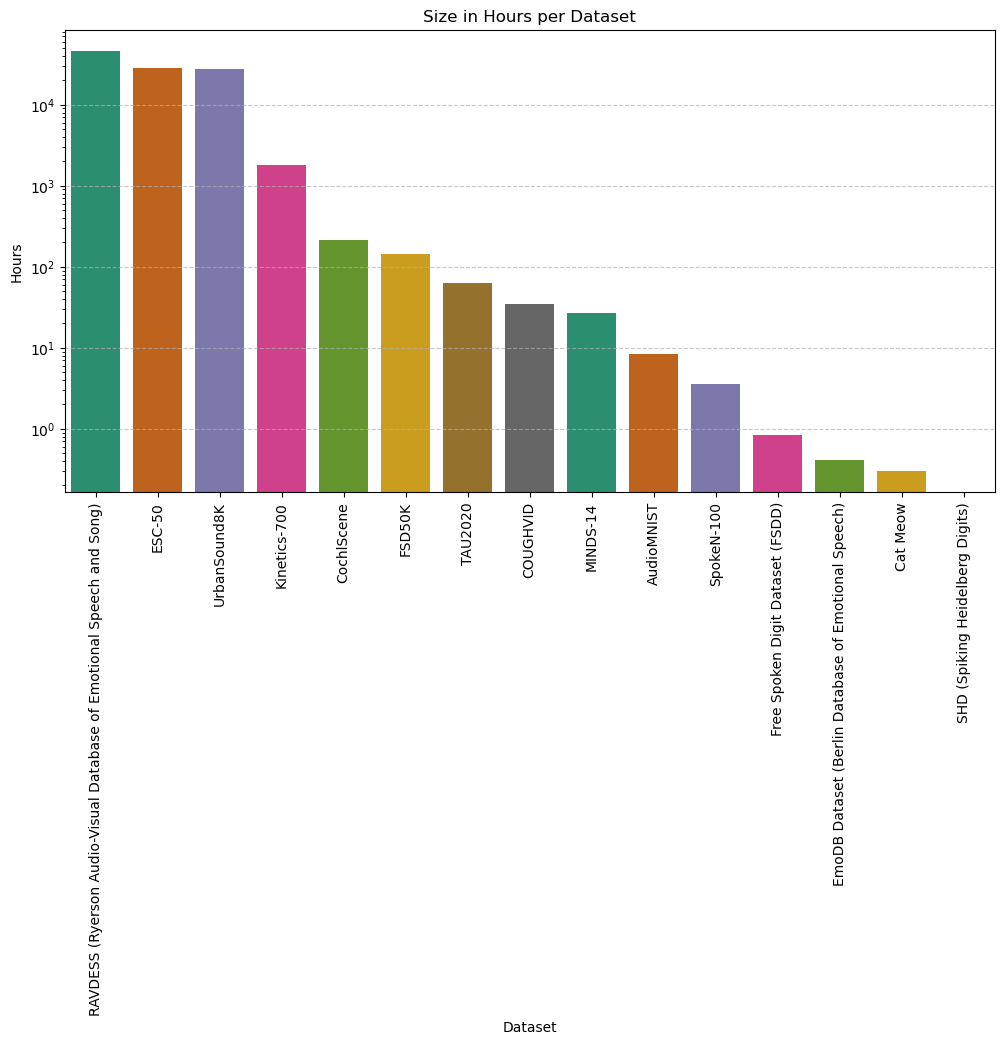

In [77]:
plt.figure(figsize=(12, 6))

df_sorted = df_datasets_filtered_classification_1.sort_values(by='Size (Hours)', ascending=False)

sns.barplot(data=df_sorted, x='Dataset', y='Size (Hours)', hue='Dataset', palette='Dark2', legend=False)

plt.title('Size in Hours per Dataset')
plt.xlabel('Dataset')
plt.ylabel('Hours')
plt.yscale("log")  

plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

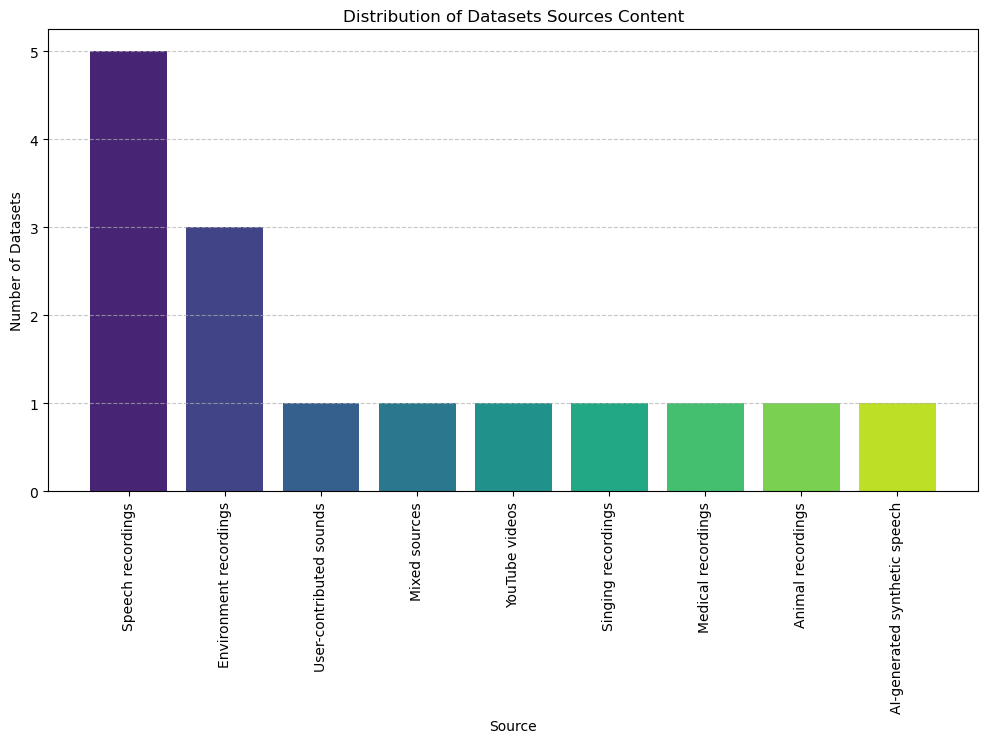

In [79]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets_filtered_classification_1, 'Category Source', 'Distribution of Datasets Sources Content', 'Source', 'Number of Datasets', 90)

plt.show()

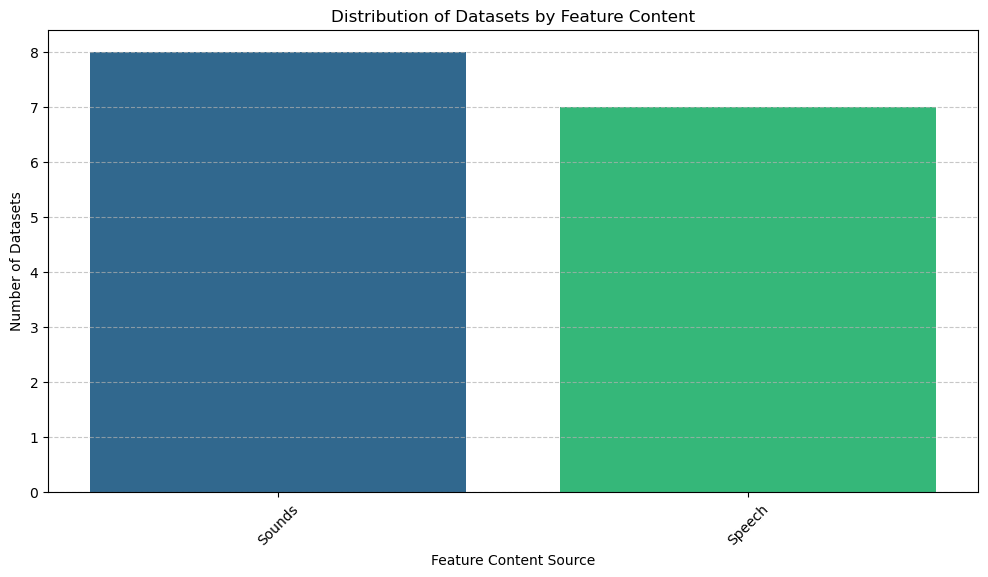

In [81]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets_filtered_classification_1, 'Music/Speech/Sounds', 'Distribution of Datasets by Feature Content', 'Feature Content Source', 'Number of Datasets', 45)

plt.show()

In [103]:
df_15_ac_datasets = pd.read_csv('ac_datasets_selected.csv', delimiter=';', quotechar='"')

In [117]:
df_15_ac_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 32 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Dataset                                                                                       15 non-null     object 
 1   Number of citations (Google Scholar)                                                          15 non-null     object 
 2   Number of Papers (Papers with code since 2020)                                                15 non-null     object 
 3   Number of Evaluations (Papers with code API)                                                  15 non-null     object 
 4   Music/Speech/Sounds                                                                           15 non-null     object 
 5   Link                           

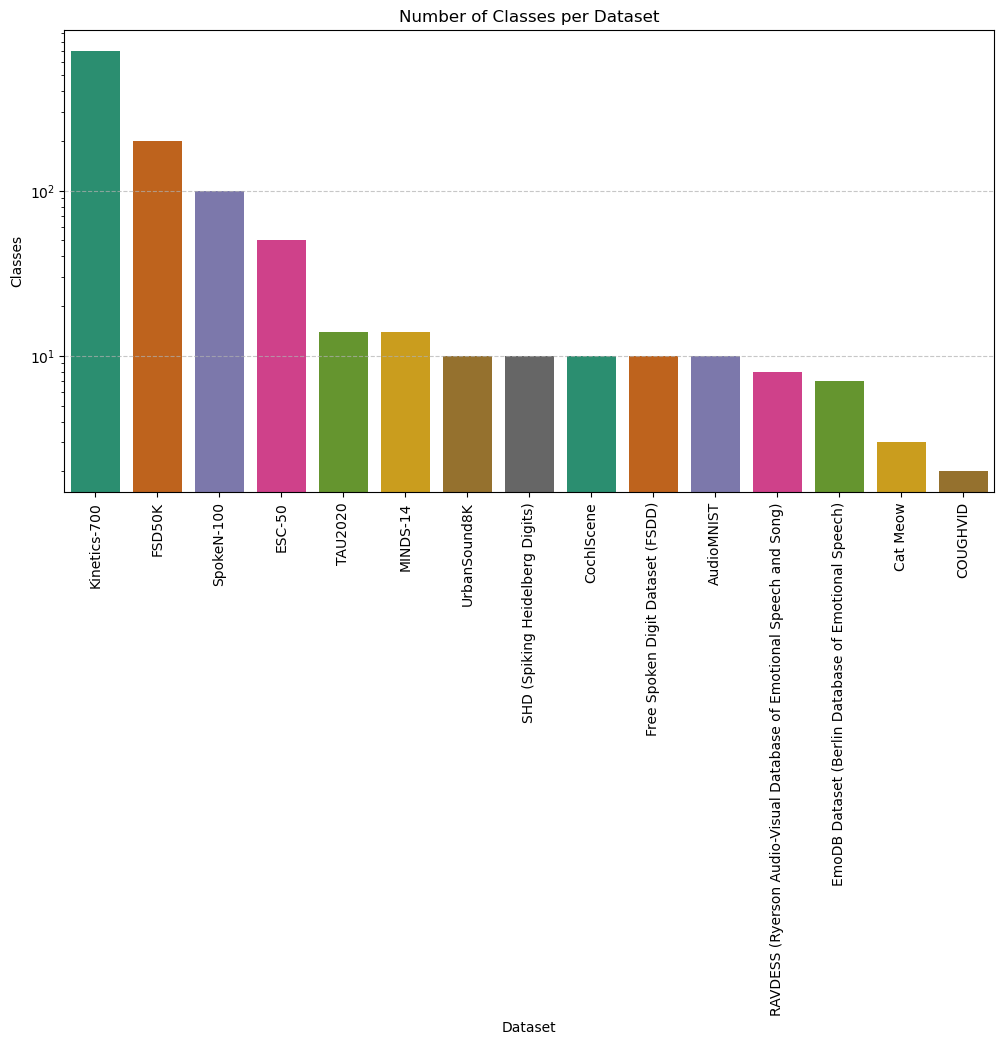

In [131]:
plt.figure(figsize=(12, 6))

df_sorted = df_15_ac_datasets.sort_values(by=' Number of Classes', ascending=False)

sns.barplot(data=df_sorted, x='Dataset', y=' Number of Classes', hue='Dataset', palette='Dark2', legend=False)

plt.title('Number of Classes per Dataset')
plt.xlabel('Dataset')
plt.ylabel('Classes')
plt.yscale("log")  

plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()